In [12]:
import foolbox
import torch
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# instantiate the model
resnet18 = models.resnet18(pretrained=True).eval()
if torch.cuda.is_available():
    resnet18 = resnet18.cuda()
mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
fmodel = foolbox.models.PyTorchModel(
    resnet18, bounds=(0, 1), num_classes=1000, preprocessing=(mean, std))

In [32]:
# get source image and label
image, label = foolbox.utils.imagenet_example(data_format='channels_first')
image = image / 255.  # because our model expects values in [0, 1]

print('label', label)
print('predicted class', np.argmax(fmodel.forward_one(image)))

label 282
predicted class 282


无定向攻击

In [10]:
# apply attack on source image
attack = foolbox.v1.attacks.FGSM(fmodel)
adversarial = attack(image, label)

In [11]:
print('adversarial class', np.argmax(fmodel.forward_one(adversarial)))

adversarial class 281


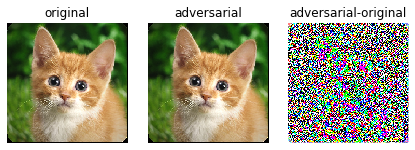

In [25]:
img = image.transpose(1, 2, 0)
plt.subplot(131)
plt.title("original")
plt.imshow(img)
plt.axis('off')

adv = adversarial.transpose(1, 2, 0)
plt.subplot(132)
plt.title("adversarial")
plt.imshow(adv)
plt.axis('off')

plt.subplot(133)
plt.title('adversarial-original')
difference = adv - img
#(-1,1)  -> (0,1)
difference = difference / abs(difference).max()/2.0+0.5
plt.imshow(difference, cmap=plt.cm.gray)
plt.axis('off')
plt.tight_layout()
plt.show()

定向攻击

In [34]:
from foolbox.criteria import TargetClassProbability

#定向攻击标签值为22
target = TargetClassProbability(22, p=0.99)

#定向攻击
attack_t = foolbox.attacks.FGSM(fmodel, criterion=target)
adversarial_t = attack(image, label)

print('adversarial class', np.argmax(fmodel.forward_one(adversarial_t)))

adversarial class 281
